### Linear Regression usecases
#### Sales Forecasting
#### Resource Consumption forecasting
#### Supply cost forecasting
#### Telecom services lifecycle forcasting

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import sklearn
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import scale
from collections import Counter
import sklearn.cross_validation

In [10]:
%matplotlib inline
rcParams['figure.figsize'] = 10,7
sb.set_style('whitegrid')

In [3]:
data = pd.read_csv('kc_house_data.csv')

In [4]:
data_columns = ['yr_built','sqft_lot','price']
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


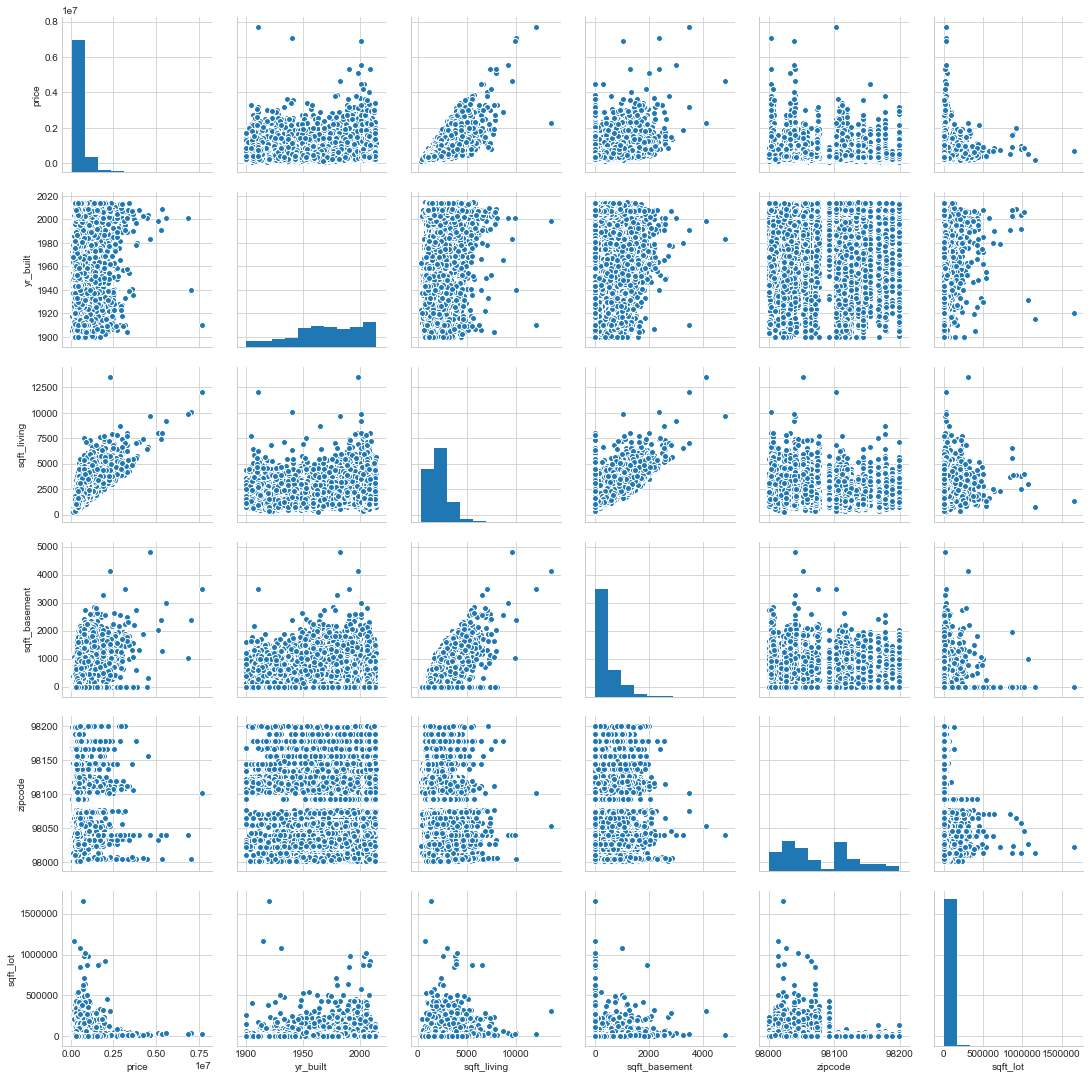

In [5]:
sb.pairplot(data, vars = ['price','yr_built','sqft_living','sqft_basement','zipcode','sqft_lot'])

                 price  yr_renovated  yr_built  sqft_living  sqft_lot  \
price         1.000000      0.126434  0.054012     0.702035  0.089661   
yr_renovated  0.126434      1.000000 -0.224874     0.055363  0.007644   
yr_built      0.054012     -0.224874  1.000000     0.318049  0.053080   
sqft_living   0.702035      0.055363  0.318049     1.000000  0.172826   
sqft_lot      0.089661      0.007644  0.053080     0.172826  1.000000   
grade         0.667434      0.014414  0.446963     0.762704  0.113621   

                 grade  
price         0.667434  
yr_renovated  0.014414  
yr_built      0.446963  
sqft_living   0.762704  
sqft_lot      0.113621  
grade         1.000000  


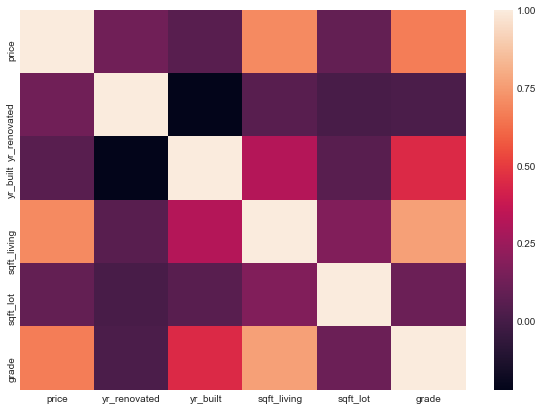

In [126]:
correlations = data[['price', 'yr_renovated', 'yr_built', 'sqft_living','sqft_lot','grade']].corr()
print (correlations)
sb.heatmap(correlations)

In [127]:
## Calculating R-squared value for square ft living area

In [128]:
x = data['sqft_living']
y = data['price']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_value

0.70203505461180049

### Observation:

### The value observed is 0.70. This seems closer to 1 so we can consider this model for further analysis.

#### Calcuating R-squared value for price vs grade

In [130]:
x = data['grade']
y = data['price']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_value

0.66743425602023454

### Observation:
### The value observed is 0.66. This seems low  so we cannot consider this model for further analysis.

#### Calcuating R-squared value for bathrooms vs price

In [133]:
x = data['bathrooms']
y = data['price']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_value

0.52513750541396187

### Observation:
### The value observed is 0.52. This seems low  so we cannot consider this model for further analysis.

#### Calcuating R-squared value for yr_built vs price

In [136]:
x = data['yr_built']
y = data['price']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_value

0.054011531494792854

### Observation:
### The value observed is 0.05. This seems very low  so we cannot consider this model for further analysis.

#### Calcuating R-squared value for floors vs price

In [139]:
x = data['floors']
y = data['price']
slope, intercept, r_value, p_value, std_err = stats.linregress(y, x)
r_value

0.25679388755071808

### Observation:
### The value observed is 0.25. This seems very low  so we cannot consider this model for further analysis.

#### Calcuating R-squared value for zipcode vs price

In [142]:
x = data['zipcode']
y = data['price']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_value

-0.053202854298325622

### Observation:
### The value observed is negative. This seems very low  so we cannot consider this model for further analysis.

In [144]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data, columns=['yr_built','sqft_living','sqft_lot','floors','sqft_basement','zipcode','grade'])

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data, columns=["price"])

I will use the least squares method as the way to estimate the coefficients.

Y = boston housing price(also called “target” data in Python)

and

X = all the other features (or independent variables)

In [145]:
#### Creates a linear Regression Object

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

lm.fit() -> fits a linear model

lm.predict() -> Predict Y using the linear model with estimated coefficients

lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model. 

In [146]:
X = df[['sqft_living','grade']]
y = target["price"]
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
 print("Estimated Coefficient : ", lm.intercept_)
print("Number of coefficient : ", len(lm.coef_))

Estimated Coefficient :  -598108.986171
Number of coefficient :  2


In [148]:
pd.DataFrame(list(zip(X.columns,lm.coef_)),columns = ['features','estimated_coefficients'])

,features,estimated_coefficients
0,sqft_living,184.420206
1,grade,98554.798139


#### There is a high corelation between grade and Price

In [149]:
x = df[['sqft_living','grade']]
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Housing Price')

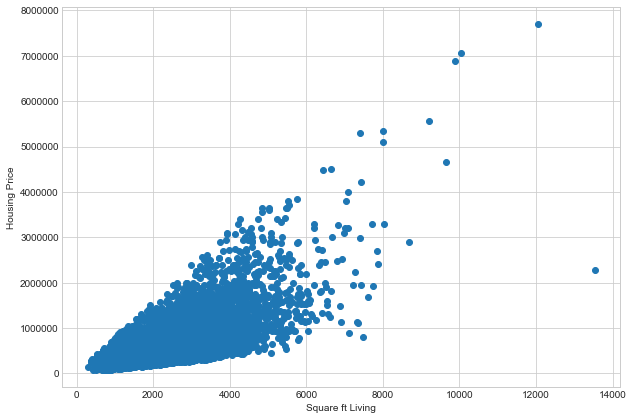

In [150]:
plt.scatter(data.sqft_living,data.price)
plt.xlabel("Square ft Living")
plt.ylabel("Housing Price")

In [151]:
lm.predict(x[0:5])

array([ 309390.44368979,  565734.52980799,  135223.36115671,
        453238.20424533,  500155.34474851])

Text(0,0.5,'Predicted Housing Price')

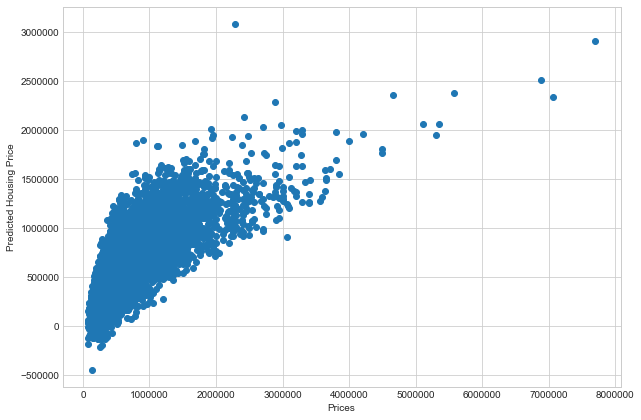

In [152]:
plt.scatter(data.price,lm.predict(x))
plt.xlabel("Prices")
plt.ylabel("Predicted Housing Price")

In [153]:
error = np.mean((y - lm.predict(x)) ** 2)

In [154]:
error

62737973366.665886

###  Shows mean squared value to get the error in predicting house prices

In [155]:
lm = LinearRegression()
lm.fit(x[['grade']],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
error2 = np.mean((y - lm.predict(x[['grade']]))**2)

In [157]:
error2

74737618184.696762

### Error2 shows the mean squared value when we take only one column i.e grade to predict the house of prices

In [184]:
X_train = X[:-50]
X_test = X[-50:]
y_train = data.price[:-50]
y_test = data.price[-50:]
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


(21563, 24)
(50, 24)
(21563,)
(50,)


`####Scikit learn provides a function called train_test_split to do this.

In [159]:
X_train,X_test, y_train, y_test = sklearn.cross_validation.train_test_split(x, data.price,test_size = 0.33, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


(14480, 2)
(7133, 2)
(14480,)
(7133,)


### Build linear Regression model using train test dataset

In [160]:
lm= LinearRegression()
lm.fit(X_train, y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

### Calculate mean squared error for  test and train dataset

In [161]:
print("Fit a model X_train and calculate MSE with y_train : " ,np.mean((y_train - lm.predict(X_train)) ** 2))
print("Fit a model X_train and calculate MSE with x_test and y_test : " ,np.mean((y_test - lm.predict(X_test)) ** 2))

Fit a model X_train and calculate MSE with y_train :  62794933354.8
Fit a model X_train and calculate MSE with x_test and y_test :  62625257601.9


### Residual plots to visualize errors in data

Text(0,0.5,'residual')

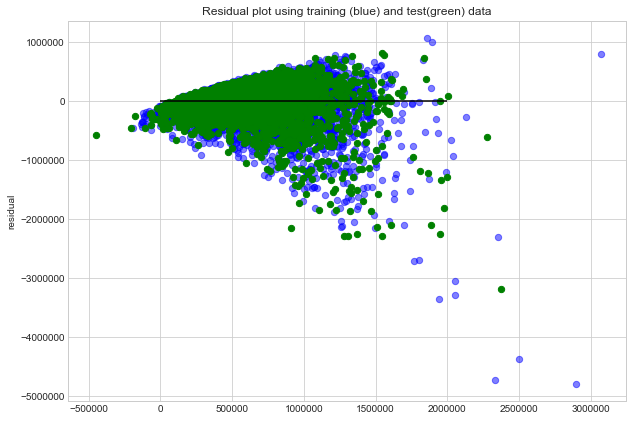

In [162]:
plt.scatter(lm.predict(X_train),lm.predict(X_train) - y_train , c= 'b', s = 40 , alpha = 0.5)
plt.scatter(lm.predict(X_test),lm.predict(X_test) - y_test , c= 'g', s = 40)
plt.hlines(y=0,xmin=0 , xmax = 2000000)
plt.title("Residual plot using training (blue) and test(green) data")
plt.ylabel('residual')

### Above graph shows the residual plot where the points lying on the horizontal line are predicted with accuracy while other train and test data sets point shows some variation

In [163]:
lm.score(X_test,y_test)

0.54127251131065424

####  Shows that percentage of prediction is 54% true which is low

### Modifying date column so that it doesn't affect the prediction of price

In [164]:
labels = data['price']
conv_date = [1 if values == 2014 else 0 for values in data.date]
data['date'] = conv_date
train1 = data.drop(['id','price'],axis = 1)

In [165]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train1,labels,test_size = 0.10,random_state = 2)

In [166]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [167]:
lm.score(x_test,y_test)

0.73275324153893928

In [187]:
stats.mstats.normaltest(data)

NormaltestResult(statistic=masked_array(data = [-- -- -- 12723.232104709881 6303.73313858297 853.5409638014819
 4409.632681461619 28921.09953244005 -- 26681.985150909884
 10954.798761555865 2695.575536418113 1715.8863423395205 4312.200792125328
 4816.777417927847 -- 14089.679641415583 -- -- 2135.005115469892
 2991.841764373994 23881.030181707018],
             mask = [ True  True  True False False False False False  True False False False
 False False False  True False  True  True False False False],
       fill_value = 1e+20)
, pvalue=array([  6.06446612e-001,   9.33333824e-046,   6.06446612e-001,
         0.00000000e+000,   0.00000000e+000,   4.52829458e-186,
         0.00000000e+000,   0.00000000e+000,   3.80033950e-254,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         3.32182511e-157,   0.00000000e+000,   3.88657110e-120,
         1.08926999e-166,   0.00000000e+000,   0.00000000e+000,
         0

### The above normality test shows the p-value for each columns of housing dataset. Value close to zero indicates that you can reject  null hypothesis

## Logistic Regression

In [168]:
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics

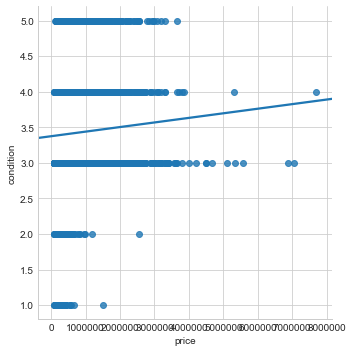

In [169]:
sb.lmplot(x='price', y='condition', data=data, ci=None)

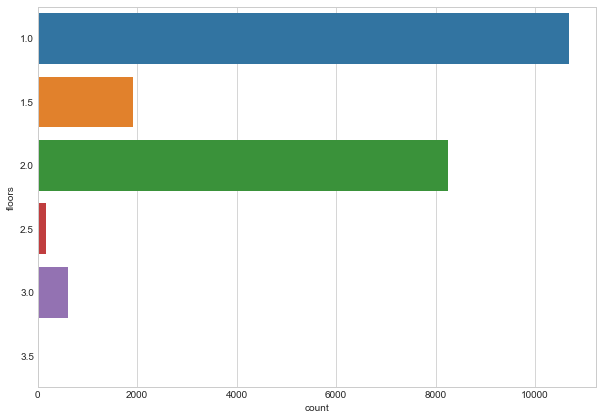

In [170]:
sb.countplot(y="floors",data = data)

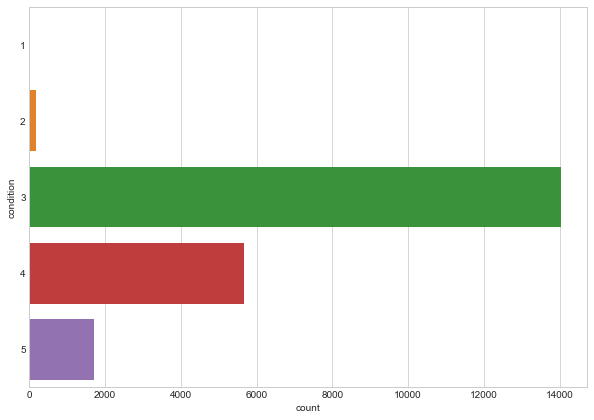

In [171]:
sb.countplot(y="condition",data = data)

### Our prediction will based on number of floors and condition level of the property

In [172]:
data3 = pd.get_dummies(data, columns =['floors', 'condition'])

In [173]:
data3.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,...,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_1,condition_2,condition_3,condition_4,condition_5
0,0,7129300520,0,221900.0,3,1.00,1180,5650,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,6414100192,0,538000.0,3,2.25,2570,7242,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2,5631500400,0,180000.0,2,1.00,770,10000,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,2487200875,0,604000.0,4,3.00,1960,5000,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,1954400510,0,510000.0,3,2.00,1680,8080,0,0,...,0,0,0,0,0,0,0,1,0,0


In [174]:
data3.drop(data3.columns[[0,1,2,3,8,9]], axis = 1, inplace = True)
data3.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'floors_1.0',
       'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5'],
      dtype='object')

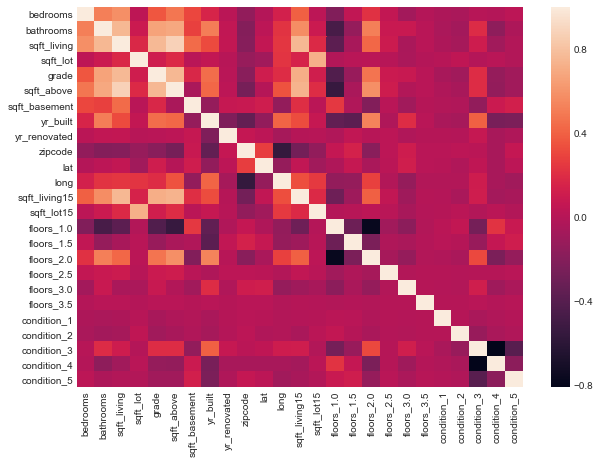

In [175]:
sb.heatmap(data3.corr())

In [176]:
X = data3.iloc[:,1:]
y = data3.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [177]:
X_train.shape

(15129, 24)

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
classifier = LogisticRegression()
from sklearn import metrics

In [180]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### The confusion matrix is a handy presentation of the accuracy of a model with two or more classes.

### The table presents predictions on the x-axis and accuracy outcomes on the y-axis.

In [181]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   0    0    1    1    1    0    0    0    0    0    0]
 [   0    0   27   33    0    0    0    0    0    0    0]
 [   0    0   82  679   16    0    0    0    0    0    0]
 [   0    0    6 2553  374    0    0    0    0    0    0]
 [   0    0    0 1134 1023    3    0    0    0    0    0]
 [   0    0    0  153  300    2    0    0    0    0    0]
 [   0    0    0   16   57    0    0    0    0    0    0]
 [   0    0    0    3   13    0    0    0    0    0    0]
 [   0    0    0    0    5    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0]]


In [182]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.56


### Cross Validation using Classification report

In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
          1       0.00      0.00      0.00        60
          2       0.71      0.11      0.18       777
          3       0.56      0.87      0.68      2933
          4       0.57      0.47      0.52      2160
          5       0.40      0.00      0.01       455
          6       0.00      0.00      0.00        73
          7       0.00      0.00      0.00        16
          8       0.00      0.00      0.00         5
          9       0.00      0.00      0.00         1
         10       0.00      0.00      0.00         1

avg / total       0.56      0.56      0.50      6484



e:\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


###  F-1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0